### Advanced Users of SHAP Values

 - Aggregates SHAP values for even more detailed model insights

### SHAP Values Review

Shap values show hoe much a given feature changed our prediction(compared to if we made that prediction at some baseline value of that feature).

### Summary Plots

SHAP summary plots give us a birds-eye view of feature importance and what is driving it. We'll walk through an example plot for the soccer data

### Summary Plots in Code

You have already seen the code to load the soccer/football data:

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('FIFA 2018 Statistics.csv')

y = (data['Man of the Match'] == 'Yes') # Convert from string "Yes"/"No" to binary

feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]

X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 1)
my_model = RandomForestClassifier(random_state= 0).fit(train_X, train_y)

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.


We get the SHAP values for all validation data with the following code. It is short enough that we explain it in the comments.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


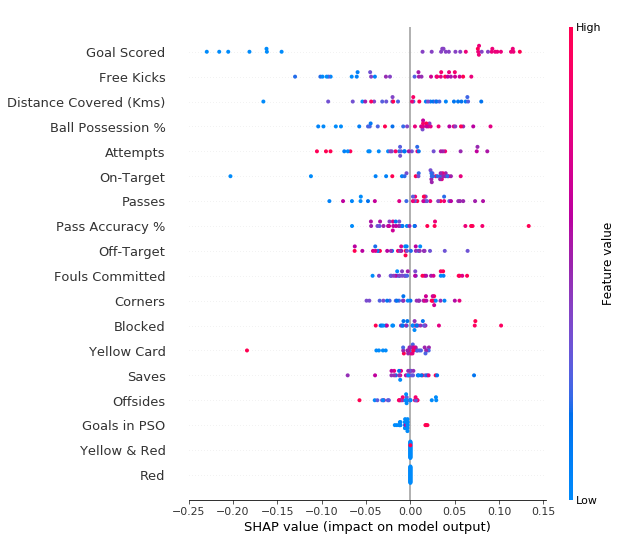

In [3]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

### SHAP Dependence Contribution Plots

- Dependence Contribution Plots in Code

We get the dependence contribution plot with the following code. The only line that's different from the `summary_plot` is the last line.

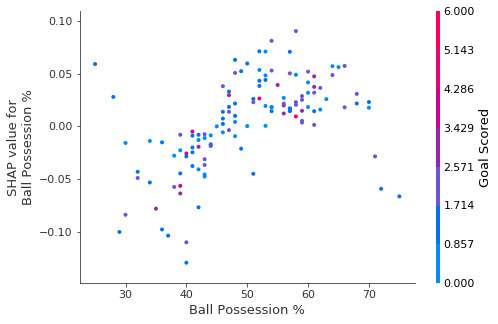

In [4]:
import shap # package used to calculate Shap values

# Create object that can calculate shap values
expaliner = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

# make plot.
shap.dependence_plot('Ball Possession %', shap_values[1], X, interaction_index= "Goal Scored")


if you don't supply an argument for `interaction_index`, Shapley uses some logic to pick one that may be intersting.

This didn't require writing a lot of code. But the trick with these techniques is in thinking critically about the results rather than writing code itself.